No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


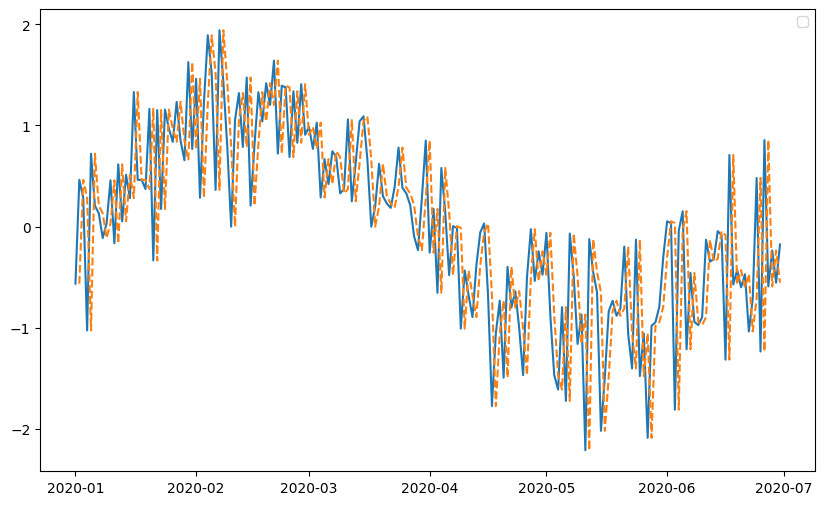

In [12]:
import numpy as np
import pandas as pd     
import matplotlib.pyplot as plt 

datos = pd.date_range(start='2020-01-01', end='2020-06-30', freq='D')
df = pd.DataFrame(datos, columns=['data'])
df['skaicius'] = np.sin(np.linspace(0, 3.14*2, len(df))) + np.random.normal(scale=0.5, size=len(df))
df['naive_forecast'] = df['skaicius'].shift(1)

plt.figure(figsize=(10,6))
plt.plot(df['data'], df['skaicius'])
plt.plot(df['data'], df['naive_forecast'], linestyle='--')
plt.legend()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


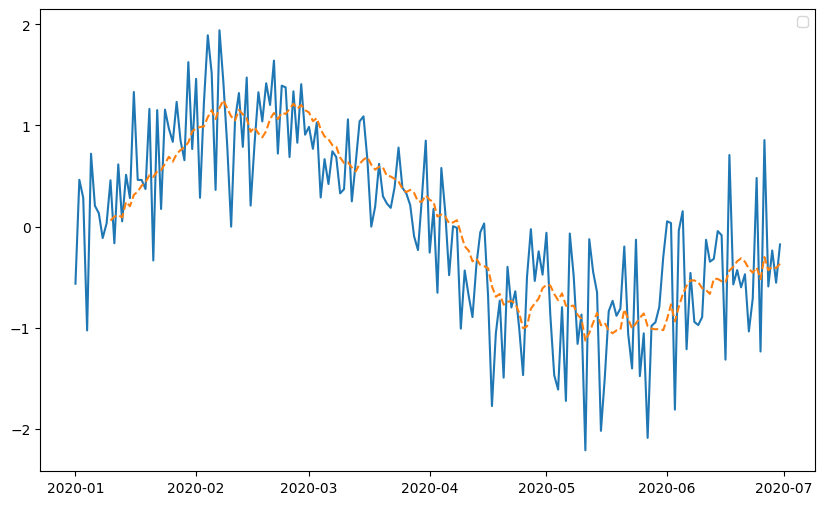

In [13]:
window_size = 10
df['moving_average'] = df['skaicius'].rolling(window=window_size).mean()

plt.figure(figsize=(10,6))
plt.plot(df['data'], df['skaicius'])
plt.plot(df['data'], df['moving_average'], linestyle='--')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


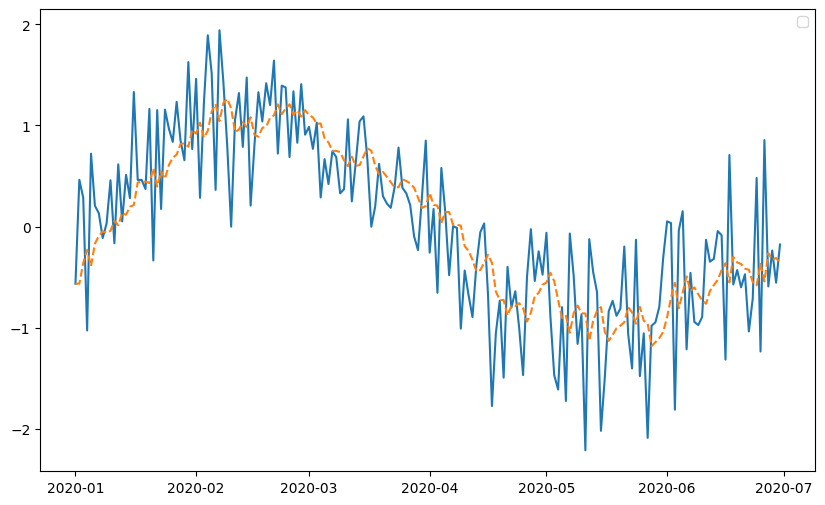

In [14]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

model = SimpleExpSmoothing(df['skaicius']).fit(smoothing_level=0.2, optimized=False)
df['exp_smoothing'] = model.fittedvalues

plt.figure(figsize=(10,6))
plt.plot(df['data'], df['skaicius'])
plt.plot(df['data'], df['exp_smoothing'], linestyle='--')
plt.legend()
plt.show()

c:\Users\ostap\OneDrive\Рабочий стол\Mokymai\Duomenu_mokslas\mokymai\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


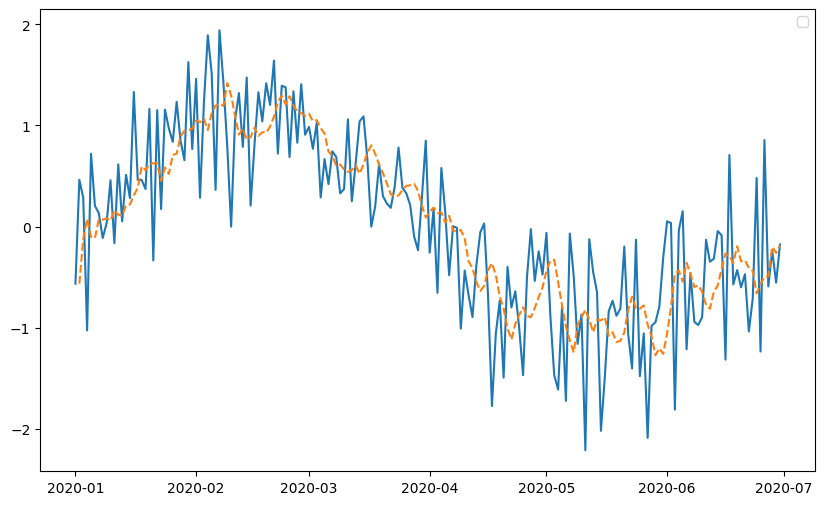

In [17]:
import statsmodels.api as sm 

model = sm.tsa.ARIMA(df['skaicius'], order=(5, 1, 0))
results = model.fit()

df['arima_forecast'] = results.predict(start=1, end=(len(df)), typ='levels')

plt.figure(figsize=(10,6))
plt.plot(df['data'], df['skaicius'])
plt.plot(df['data'], df['arima_forecast'], linestyle='--')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


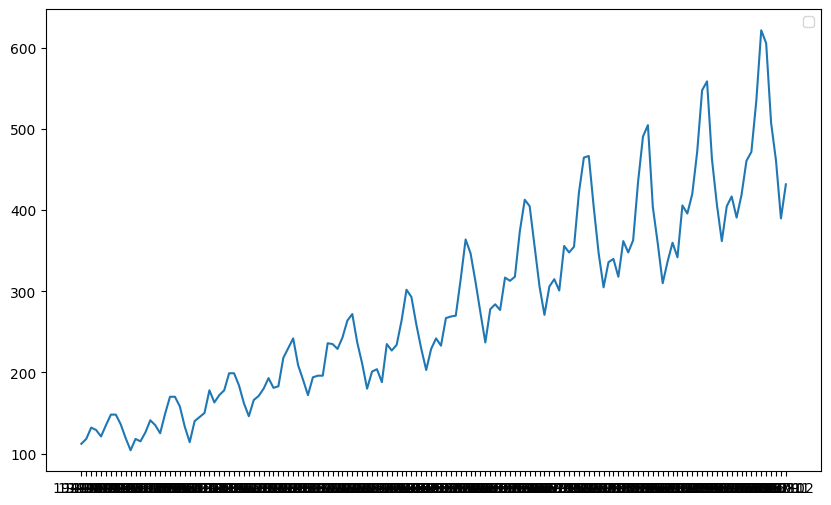

In [10]:
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'

flights_df = pd.read_csv(url)

plt.figure(figsize=(10,6))
plt.plot(flights_df['Month'], flights_df['Passengers'])
plt.legend()
plt.show()